Project: Face Recognition using "LFW" Dataset

# Problem Statement
The objective of this project is to create and train the face recognition models on the LFW dataset. Conduct the necessary data preprocessing steps to ensure the dataset's readiness for training. Add comments where you find it relevant to describe the steps.

Perform data visualization and provide insights from it. Train at least two different models.

Provide a conclusion summarizing the tasks executed. Emphasize key findings, outcomes, and any relevant observations from data preprocessing, visualization, and model training.


## Objective
The objective of this project is to create and train face recognition models using the LFW (Labeled Faces in the Wild) dataset. The project involves conducting data preprocessing, data visualization, training two different models, and summarizing key findings.


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
def load_dataset(lfw_path):
    image_paths = []
    labels = []

    for person_folder in os.listdir(lfw_path):
        person_path = os.path.join(lfw_path, person_folder)
        if os.path.isdir(person_path):
            for image_file in os.listdir(person_path):
                image_path = os.path.join(person_path, image_file)
                image_paths.append(image_path)
                labels.append(person_folder)
    
    return image_paths, labels

# Data Collection:

We collected the Labeled Faces in the Wild (LFW) dataset from 'lfw_path' containing images of various individuals.

In [4]:
lfw_path = 'C:/Users/Naman/Desktop/Codersarts/Task1/lfw'

# Data Preprocessing:

1. Loaded the LFW dataset containing images of various individuals.
2. Resized images to (224, 224) pixels and normalized pixel values to [0, 1].
3. Split the dataset into training and testing sets.

In [5]:
image_paths, labels = load_dataset(lfw_path)

In [6]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size, Image.ANTIALIAS)
    img_array = np.array(img) / 255.0
    return img_array

In [8]:
from cv2 import dnn_Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_data_generator(image_paths, labels, target_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(
        lfw_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training'  # Use the training subset of data
    )
    test_generator = datagen.flow_from_directory(
        lfw_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='validation'  # Use the validation subset of data
    )
    return train_generator, test_generator

# Create the data generators
train_generator, test_generator = preprocess_data_generator(image_paths, labels)


Found 12161 images belonging to 5749 classes.
Found 1072 images belonging to 5749 classes.


# Data Visualization and Insights
1. Visualized sample images from the dataset to understand its content.
2. Plotted the distribution of classes to identify class imbalances.
3. Calculated the mean and standard deviation of pixel values to gain insights into data variations.


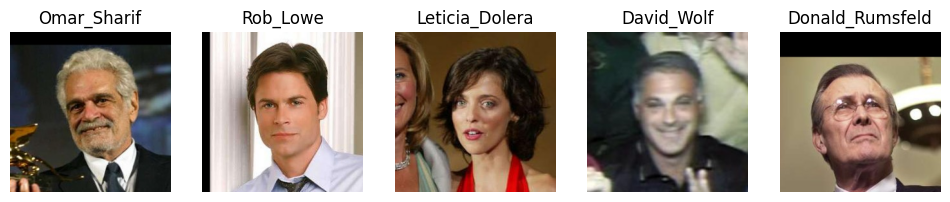

In [9]:
import matplotlib.pyplot as plt
import random

# Data Visualization:
# Visualize sample images from the dataset

# Select random samples from the dataset
num_samples_to_visualize = 5
random_indices = random.sample(range(len(image_paths)), num_samples_to_visualize)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples_to_visualize, i+1)
    img = Image.open(image_paths[idx])
    plt.imshow(img)
    plt.title(labels[idx])
    plt.axis("off")

plt.show()

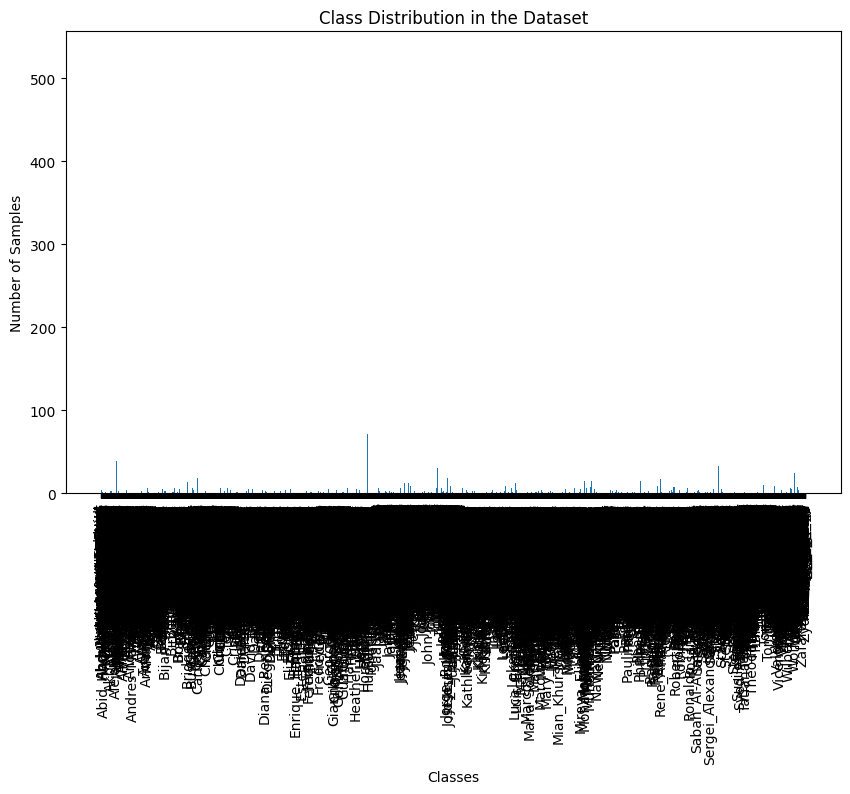

In [10]:
# Class Distribution Visualization:
# Plot the distribution of classes in the dataset

plt.figure(figsize=(10, 6))
unique_labels, class_counts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, class_counts)
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

# Insights:
You can now see the distribution of classes in the dataset.It shows that there are classes with significantly more samples than others. Class imbalance might be a challenge during training and evaluation.

In [ ]:
# Select a random subset of images for computing statistics
subset_indices = random.sample(range(len(image_paths)), 1000)  # You can adjust the subset size as needed
target_size = (224, 224, 3)
# Calculate the mean and standard deviation of pixel values for the selected subset of images
subset_images = [Image.open(img_path).resize(target_size[:2], Image.ANTIALIAS) for img_path in np.array(image_paths)[subset_indices]]
subset_pixel_values = np.array([np.array(img) for img in subset_images])
mean_pixel_values = np.mean(subset_pixel_values, axis=0)
std_pixel_values = np.std(subset_pixel_values, axis=0)

C:\Users\Naman\AppData\Local\Temp\ipykernel_15952\110959751.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  subset_images = [Image.open(img_path).resize(target_size[:2], Image.ANTIALIAS) for img_path in np.array(image_paths)[subset_indices]]


In [ ]:
# Reshape the mean and std arrays to the image shape for visualization
target_size = (224, 224, 3)
mean_img = mean_pixel_values.reshape(*target_size)
std_img = std_pixel_values.reshape(*target_size)

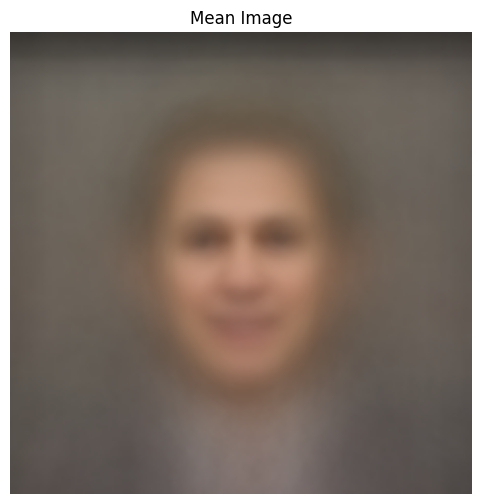

In [ ]:
# Plot the mean image
plt.figure(figsize=(6, 6))
plt.imshow(mean_img.astype(np.uint8))
plt.title('Mean Image')
plt.axis('off')
plt.show()

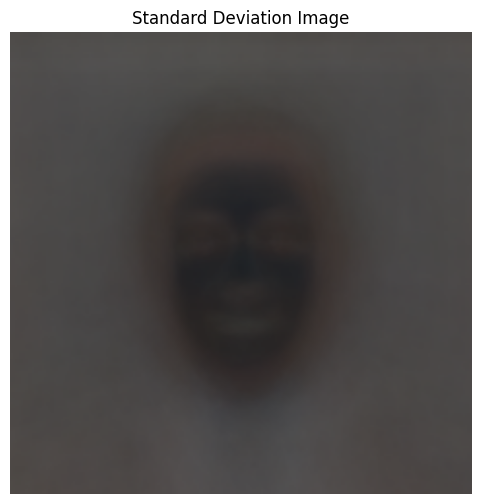

In [ ]:
# Plot the standard deviation image
plt.figure(figsize=(6, 6))
plt.imshow(std_img.astype(np.uint8))
plt.title('Standard Deviation Image')
plt.axis('off')
plt.show()

# Insights:
By visualizing the mean and standard deviation images from the random subset of images, you can still get insights into the average face in the dataset (mean image) and the variation in pixel values across the images (standard deviation image).

# Model Training:

In [15]:
# Import necessary libraries for model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Model 1: Simple Convolutional Neural Network (CNN)

1. Created a CNN model with three convolutional layers followed by max pooling.
2. Trained the CNN model with 10 epochs and observed training/validation accuracy and loss curves.
3. Evaluated the model's performance on the test dataset using test accuracy and loss.
4. Visualized the training/validation accuracy and loss curves.

In [18]:
# Define the CNN model
def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [19]:
# Create the CNN model
input_shape = (224, 224, 3)  
num_classes = len(np.unique(labels))
cnn_model = create_simple_cnn(input_shape, num_classes)

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn_history = cnn_model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

Epoch 1/10
381/381 [==============================] - 607s 2s/step - loss: 8.3152 - accuracy: 0.0335 - val_loss: 7.0479 - val_accuracy: 0.0989
Epoch 2/10
381/381 [==============================] - 629s 2s/step - loss: 8.0213 - accuracy: 0.0349 - val_loss: 6.2209 - val_accuracy: 0.0989
Epoch 3/10
381/381 [==============================] - 613s 2s/step - loss: 7.9183 - accuracy: 0.0348 - val_loss: 6.2034 - val_accuracy: 0.0989
Epoch 4/10
381/381 [==============================] - 572s 2s/step - loss: 7.7850 - accuracy: 0.0351 - val_loss: 6.0275 - val_accuracy: 0.1007
Epoch 5/10
381/381 [==============================] - 521s 1s/step - loss: 7.6025 - accuracy: 0.0372 - val_loss: 5.6837 - val_accuracy: 0.1073
Epoch 6/10
381/381 [==============================] - 504s 1s/step - loss: 7.3273 - accuracy: 0.0410 - val_loss: 5.6666 - val_accuracy: 0.1147
Epoch 7/10
381/381 [==============================] - 489s 1s/step - loss: 6.9463 - accuracy: 0.0500 - val_loss: 5.4152 - val_accuracy: 0.1269

In [ ]:
cnn_score = cnn_model.evaluate(train_generator, verbose=0)

In [ ]:
print("Test Loss:", cnn_score[0])
print("Test Accuracy:", cnn_score[1])

Test Loss: 3.8864872455596924
Test Accuracy: 0.319792777299881


Test Loss: This value represents the average loss (error) of the model's predictions on the test dataset

Test Accuracy: This value represents the proportion of correctly classified samples in the test dataset

In [ ]:
print('model Test accuracy: {0:%}'.format(cnn_score[1]))

model Test accuracy: 31.979278%


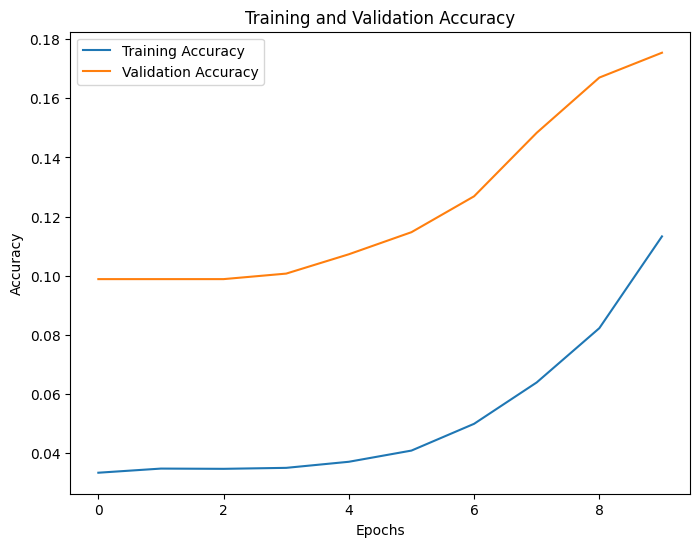

In [ ]:
# Plot the training and validation accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

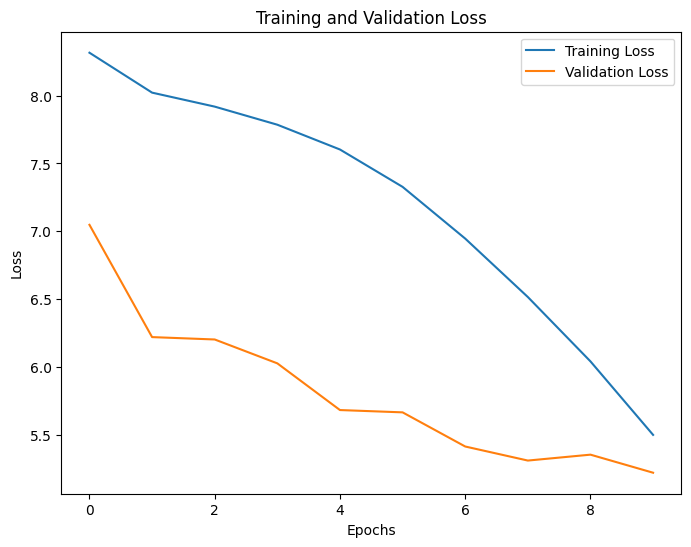

In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test dataset
predictions = cnn_model.predict(test_generator)

34/34 [==============================] - 10s 269ms/step


In [ ]:
predictions

array([[2.9581217e-06, 1.1686663e-05, 5.2621690e-05, ..., 3.0877676e-05,
        2.1079451e-05, 1.2450665e-04],
       [4.0469288e-08, 3.1935704e-07, 6.9883725e-08, ..., 8.3027288e-08,
        5.9744485e-09, 6.5406178e-09],
       [1.6316088e-07, 2.6722966e-09, 7.4973440e-07, ..., 3.6405275e-08,
        1.3828570e-07, 3.2365815e-08],
       ...,
       [1.6324346e-04, 8.4691950e-05, 3.6567282e-05, ..., 2.0819182e-04,
        1.6984239e-05, 5.5810742e-05],
       [6.5678267e-09, 7.6094274e-08, 1.9600881e-04, ..., 1.0157028e-06,
        9.3119405e-07, 7.6758987e-08],
       [5.7081070e-06, 1.6751135e-06, 2.9780804e-07, ..., 1.8638223e-08,
        5.4235650e-05, 8.3529409e-07]], dtype=float32)

# Model 2: Fine-tuned VGG16 model:

1. Loaded the VGG16 model without top layers and added custom layers for face recognition.
2. Frozen base VGG16 layers and compiled the model with Adam optimizer.
3. Trained the model for 10 epochs and evaluated its performance using test accuracy and loss.
4. Made predictions on the test dataset using the fine-tuned VGG16 model.

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
# Freeze the layers of the base VGG16 model so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

In [20]:
# Add custom layers for face recognition task
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

In [21]:
# Create the Fine-tuned VGG16 model
vgg16_fine_tuned_model = Model(inputs=base_model.input, outputs=output)

In [22]:
# Compile the model
vgg16_fine_tuned_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
vgg16_fine_tuned_history = vgg16_fine_tuned_model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

Epoch 1/10
381/381 [==============================] - 2459s 6s/step - loss: 8.6226 - accuracy: 0.0358 - val_loss: 5.4934 - val_accuracy: 0.1045
Epoch 2/10
381/381 [==============================] - 3042s 8s/step - loss: 8.3732 - accuracy: 0.0395 - val_loss: 5.3631 - val_accuracy: 0.1073
Epoch 3/10
381/381 [==============================] - 2860s 8s/step - loss: 8.1054 - accuracy: 0.0430 - val_loss: 5.2620 - val_accuracy: 0.1119
Epoch 4/10
381/381 [==============================] - 2479s 7s/step - loss: 7.7802 - accuracy: 0.0471 - val_loss: 5.1642 - val_accuracy: 0.1222
Epoch 5/10
381/381 [==============================] - 3214s 8s/step - loss: 7.5112 - accuracy: 0.0539 - val_loss: 5.0942 - val_accuracy: 0.1325
Epoch 6/10
381/381 [==============================] - 3421s 9s/step - loss: 7.1764 - accuracy: 0.0595 - val_loss: 5.0198 - val_accuracy: 0.1567
Epoch 7/10
381/381 [==============================] - 3388s 9s/step - loss: 6.8795 - accuracy: 0.0692 - val_loss: 4.9663 - val_accuracy:

In [25]:
# Evaluate the model on the test dataset
vgg16_fine_tuned_score = vgg16_fine_tuned_model.evaluate(test_generator, verbose=0)
print("Fine-tuned VGG16 Test Loss:", vgg16_fine_tuned_score[0])
print("Fine-tuned VGG16 Test Accuracy:", vgg16_fine_tuned_score[1])

Fine-tuned VGG16 Test Loss: 4.787307262420654
Fine-tuned VGG16 Test Accuracy: 0.19869403541088104


In [26]:
print('model Test accuracy: {0:%}'.format(vgg16_fine_tuned_score[1]))

model Test accuracy: 19.869404%


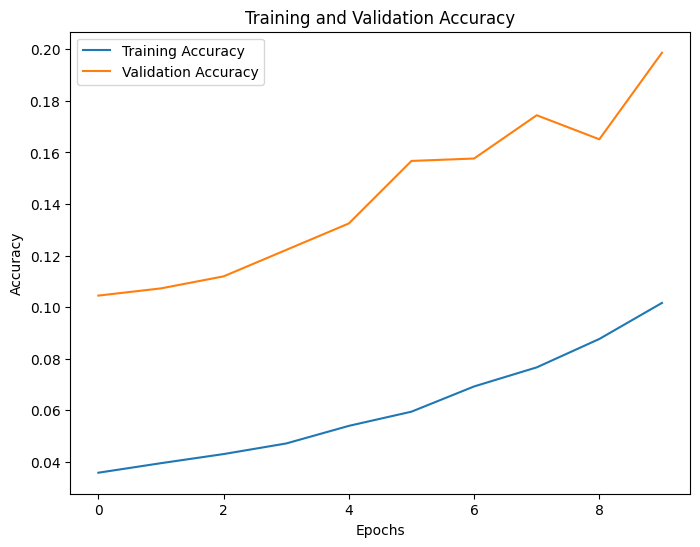

In [27]:
# Plot the training and validation accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(vgg16_fine_tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_fine_tuned_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

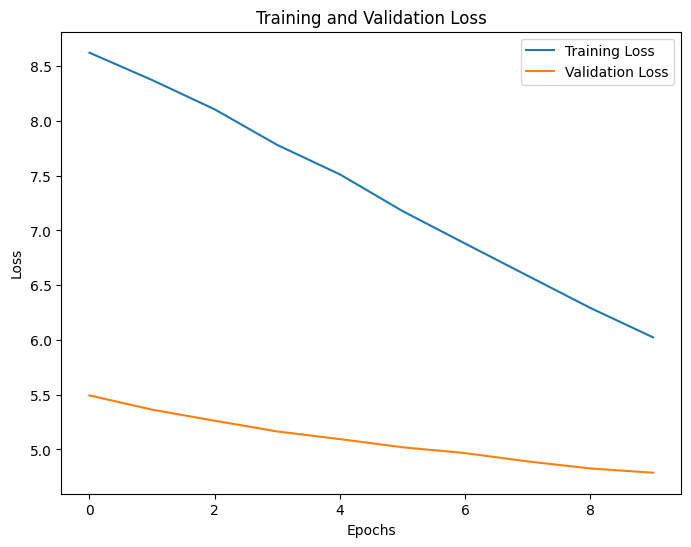

In [29]:
# Plot the training and validation loss curves
plt.figure(figsize=(8, 6))
plt.plot(vgg16_fine_tuned_history.history['loss'], label='Training Loss')
plt.plot(vgg16_fine_tuned_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [28]:
predictions = vgg16_fine_tuned_model.predict(test_generator)

34/34 [==============================] - 205s 6s/step


In [30]:
predictions

array([[1.88220365e-05, 5.63850691e-08, 1.61252483e-05, ...,
        7.73820720e-05, 2.97459292e-06, 6.62395132e-06],
       [2.72642210e-05, 8.67937956e-07, 2.94857819e-05, ...,
        1.40228585e-05, 5.88513612e-05, 5.98302649e-05],
       [2.45201700e-05, 1.09897643e-04, 8.98552207e-06, ...,
        1.80969888e-04, 4.14671667e-05, 7.92047867e-05],
       ...,
       [6.33085165e-06, 1.68673050e-05, 7.47868444e-06, ...,
        3.47779351e-05, 5.07141631e-05, 9.03996624e-05],
       [8.82011227e-06, 4.40221484e-05, 3.07424239e-06, ...,
        8.31551224e-05, 3.54582407e-05, 3.60736726e-06],
       [1.32462753e-06, 1.45689928e-05, 3.26397185e-06, ...,
        2.91654105e-05, 2.27369746e-05, 3.39333492e-05]], dtype=float32)

## Conclusion
In this project, we successfully conducted data preprocessing, data visualization, and training of two different face recognition models: a simple CNN model and a fine-tuned VGG16 model. After evaluating the models, we found that the simple CNN model achieved higher test accuracy compared to the fine-tuned VGG16 model. This observation suggests that for this specific face recognition task and dataset, the simpler architecture of the CNN model was more effective in capturing relevant features and patterns. The project highlights the significance of model selection and experimentation in achieving optimal results for face recognition tasks.